In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, 'data')
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'Billionaires Statistics Dataset.csv'))
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [4]:
df.query("industries == 'Sports' and gender == 'F'")

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
532,523,5100,Sports,Denise York & family,72.0,United States,Youngstown,San Francisco 49ers,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
544,534,5000,Sports,Janice McNair,86.0,United States,Houston,"Energy, sports",Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
580,580,4700,Sports,Gayle Benson,76.0,United States,New Orleans,New Orleans Saints,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
1724,1725,1700,Sports,Amy Adams Strunk,67.0,United States,Nashville,Tennessee Titans,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
2235,2133,1300,Sports,Jessica Steinbrenner,59.0,United States,Tampa,Sports,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
2236,2133,1300,Sports,Jennifer Steinbrenner Swindal,63.0,United States,Tampa,Sports,Sports,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891


In [5]:
df_bl_per_country_city = df.groupby(['country', 'city']).size()

# Worldmap

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\benne\AppData\Local\Temp\ipykernel_14324\601121909.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [7]:
if isinstance(df_bl_per_country_city, pd.Series):
    df_bl_per_country_city_geo = df_bl_per_country_city.reset_index(name='count')
else:
    df_bl_per_country_city_geo = df_bl_per_country_city

In [8]:
# Merging der Daten
merged = world.merge(df_bl_per_country_city_geo, how='left', left_on='name', right_on='country')

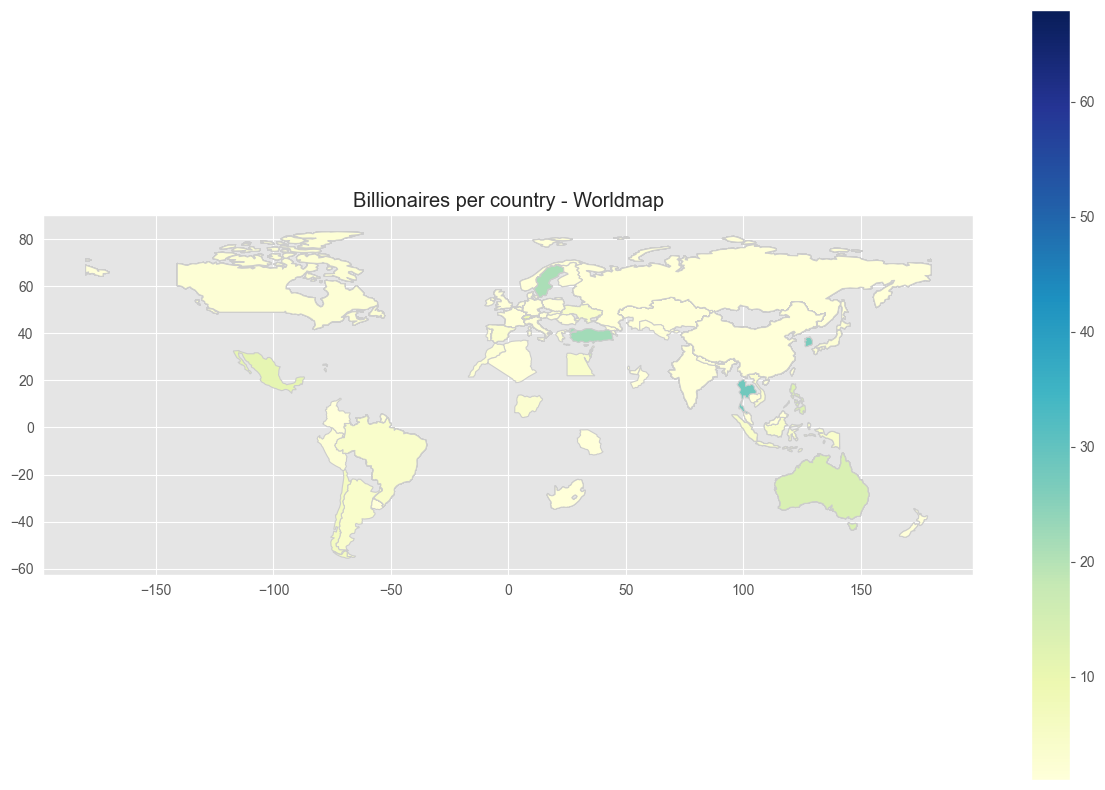

In [9]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='count', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Billionaires per country - Worldmap')
plt.show()

# Billionaires per country, and wealthsource | Histogram

In [48]:
top_countries = df['country'].value_counts().head(20).index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]
df_top_countries

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2540,1000,Healthcare,Yi Xianzhong & family,63.0,China,Guangzhou,Pharmaceuticals,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [49]:
df_top_countries = df_top_countries.rename(columns={'selfMade':'wealthSource'})

In [50]:
replace_dict = {True: 'selfMade',
                False: 'inherited/unearned'}

In [51]:
df_top_countries['wealthSource'] = df_top_countries['wealthSource'].replace(replace_dict)
df_top_countries

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2540,1000,Healthcare,Yi Xianzhong & family,63.0,China,Guangzhou,Pharmaceuticals,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [52]:
sns.set_theme(style="darkgrid")

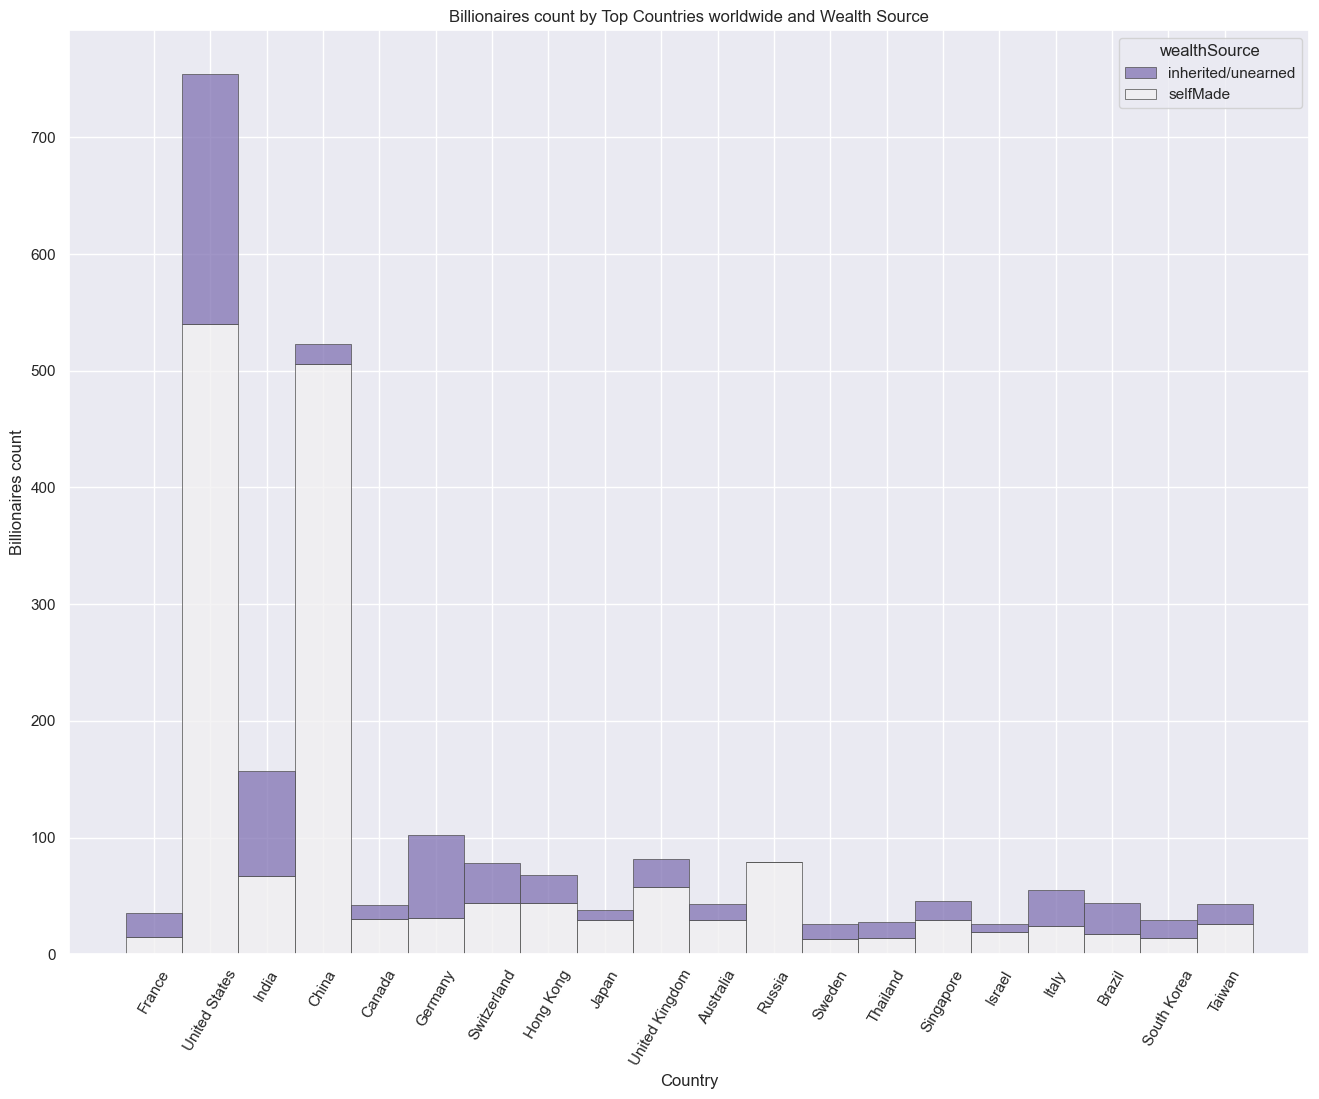

In [53]:
plt.figure(figsize=(16, 12))
sns.histplot(
    df_top_countries,
    x="country", hue="wealthSource",
    edgecolor=".3",
    palette="light:m_r",
    multiple='stack',
    linewidth=.5,
    stat='count'
)
plt.xticks(rotation=60)
plt.title("Billionaires count by Top Countries worldwide and Wealth Source")
plt.ylabel("Billionaires count")
plt.xlabel("Country")
plt.show()

# Billionaires per industry, age and gender | VIOLIN PLOT

In [60]:
df.query('industries == "Telecom" and gender == "F"')


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country


In [61]:
df.query('industries == "Automotive" and gender == "F"')['age'].min()
#df[df['industries'] == 'Media & Entertainment']['age'].mean()

50.0

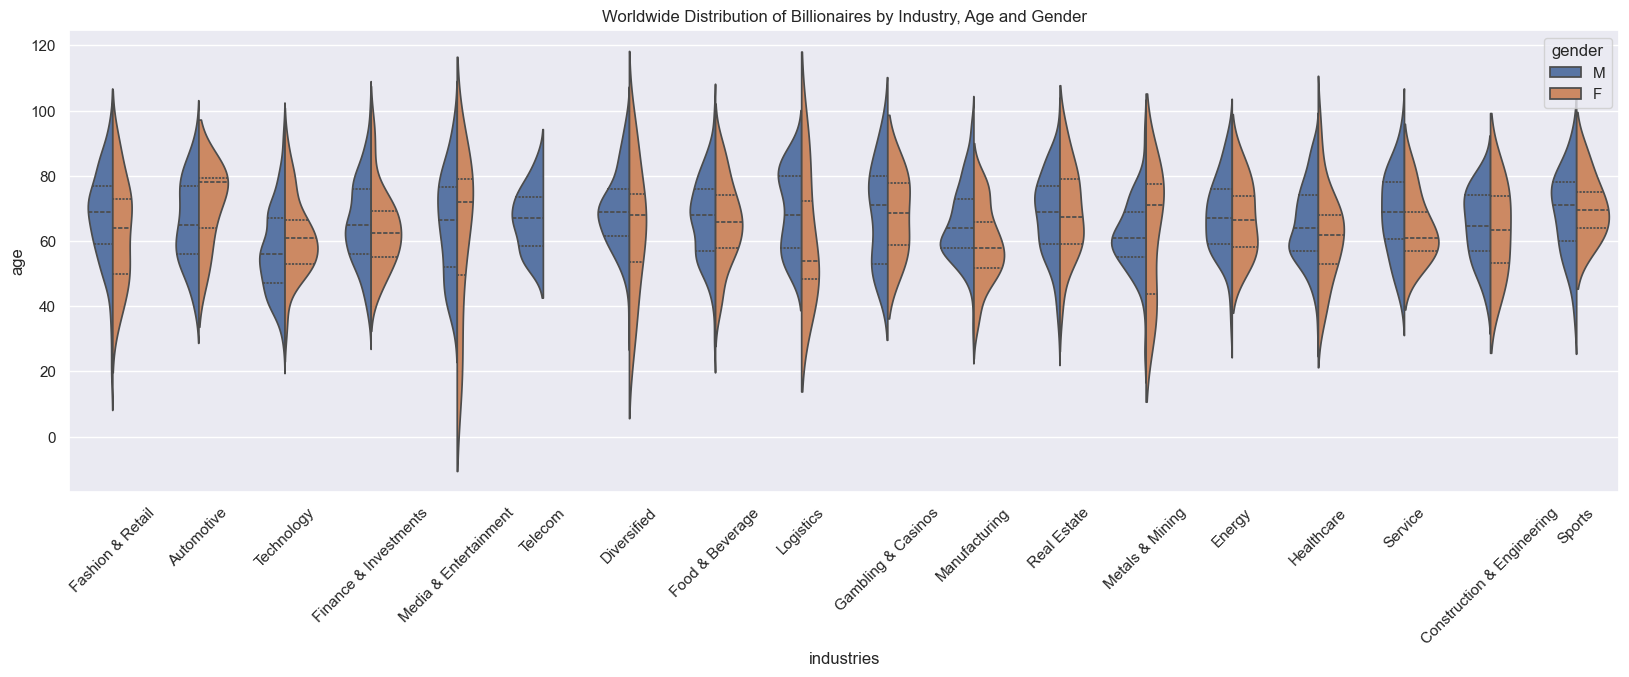

In [43]:
plt.figure(figsize=(20, 6))
sns.violinplot(data=df, x="industries", y="age", hue='gender', inner="quart"
               , split=True)
plt.title("Worldwide Distribution of Billionaires by Industry, Age and Gender")
plt.xticks(rotation=45)
plt.show()

# Scatterplot

In [63]:
df['country'].unique()

array(['France', 'United States', 'Mexico', 'India', 'Spain', 'China',
       'Canada', 'Germany', 'Switzerland', 'Belgium', 'Hong Kong',
       'Austria', 'Japan', 'United Kingdom', 'Australia', 'Indonesia',
       'United Arab Emirates', 'Russia', 'Chile', 'Monaco',
       'Czech Republic', 'Sweden', nan, 'Thailand', 'Uzbekistan',
       'Singapore', 'Nigeria', 'Israel', 'Italy', 'South Africa',
       'Brazil', 'Malaysia', 'South Korea', 'New Zealand', 'Philippines',
       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Eswatini (Swaziland)',
       'Colombia', 'Netherlands', 'Poland', 'Bahamas', 'Ukraine',
       'Cayman Islands', 'Greece', 'Turkey', 'Argentina', 'Georgia',
       'Portugal', 'Kazakhstan', 'Algeria', 'Vietnam', 'Latvia',
       'Finland', 'Bermuda', 'Luxembourg', 'British Virgin Islands',
       'Cambodia', 'Lebanon', 'Oman', 'Ireland', 'Cyprus', 'Guernsey',
       'Liechtenstein', 'Turks and Caicos Islands', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Mo

In [64]:
df.query('country == "New Zealand"')

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
232,232,8600,Finance & Investments,Graeme Hart,67.0,New Zealand,Auckland,Investments,Finance & Investments,New Zealand,...,1.6,"$206,928,765,544",82.0,100.0,81.9,29.0,34.6,4841000.0,-40.900557,174.885971
1940,1905,1500,Media & Entertainment,Peter Jackson,61.0,New Zealand,Wellington,"Movies, digital effects",Media & Entertainment,New Zealand,...,1.6,"$206,928,765,544",82.0,100.0,81.9,29.0,34.6,4841000.0,-40.900557,174.885971


In [74]:
country_to_global_region_dict = {
    'France': 'West Europe',
    'United States': 'North America',
    'Mexico': 'North America',
    'India': 'Asia',
    'Spain': 'West Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Germany': 'West Europe',
    'Switzerland': 'West Europe',
    'Belgium': 'West Europe',
    'Hong Kong': 'Asia',
    'Austria': 'West Europe',
    'Japan': 'Asia',
    'United Kingdom': 'West Europe',
    'Australia': 'Oceania',
    'Indonesia': 'Asia',
    'United Arab Emirates': 'Asia',
    'Russia': 'East Europe',
    'Chile': 'South America',
    'Monaco': 'West Europe',
    'Czech Republic': 'East Europe',
    'Sweden': 'West Europe',
    'Thailand': 'Asia',
    'Uzbekistan': 'Asia',
    'Singapore': 'Asia',
    'Nigeria': 'Africa',
    'Israel': 'Asia',
    'Italy': 'West Europe',
    'South Africa': 'Africa',
    'Brazil': 'South America',
    'Malaysia': 'Asia',
    'South Korea': 'Asia',
    'New Zealand': 'Oceania',
    'Philippines': 'Asia',
    'Taiwan': 'Asia',
    'Norway': 'West Europe',
    'Egypt': 'Africa',
    'Denmark': 'West Europe',
    'Eswatini (Swaziland)': 'Africa',
    'Colombia': 'South America',
    'Netherlands': 'West Europe',
    'Poland': 'East Europe',
    'Bahamas': 'North America',
    'Ukraine': 'East Europe',
    'Cayman Islands': 'North America',
    'Greece': 'West Europe',
    'Turkey': 'Asia',
    'Argentina': 'South America',
    'Georgia': 'East Europe',
    'Portugal': 'West Europe',
    'Kazakhstan': 'Asia',
    'Algeria': 'Africa',
    'Vietnam': 'Asia',
    'Latvia': 'East Europe',
    'Finland': 'West Europe',
    'Bermuda': 'North America',
    'Luxembourg': 'West Europe',
    'British Virgin Islands': 'North America',
    'Cambodia': 'Asia',
    'Lebanon': 'Asia',
    'Oman': 'Asia',
    'Ireland': 'West Europe',
    'Cyprus': 'Asia',
    'Guernsey': 'West Europe',
    'Liechtenstein': 'West Europe',
    'Turks and Caicos Islands': 'North America',
    'Romania': 'East Europe',
    'Qatar': 'Asia',
    'Uruguay': 'South America',
    'Nepal': 'Asia',
    'Slovakia': 'East Europe',
    'Morocco': 'Africa',
    'Hungary': 'East Europe',
    'Tanzania': 'Africa',
    'Bahrain': 'Asia',
    'Peru': 'South America',
    'Andorra': 'West Europe',
    'Armenia': 'East Europe',
    'NaN': 'Unknown'
}


In [75]:
df['globalRegion'] = df['country'].replace(country_to_global_region_dict)
df.query('country == globalRegion')

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,globalRegion


In [76]:
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,globalRegion
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,West Europe
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,North America
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,North America
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,Asia
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,North America
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,Asia
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,Asia


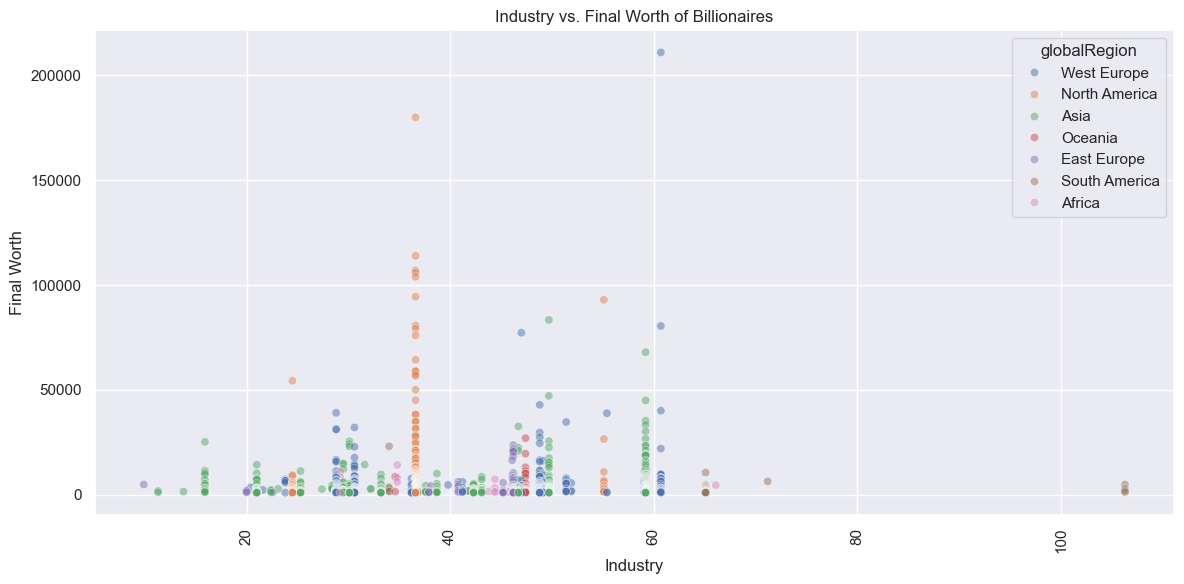

In [80]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='total_tax_rate_country', y='finalWorth', alpha=0.5,
                hue='globalRegion')
plt.xlabel('Industry')
plt.ylabel('Final Worth')
plt.title('Industry vs. Final Worth of Billionaires')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()